In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

In [3]:
N = 5
matrix = np.random.choice([0, 1], size=(N, N))
np.savetxt('random_matrix.txt', matrix, fmt='%d')

In [4]:
def create_gif(path, name, dest_name, num_ele):
    fig, ax = plt.subplots()
    #plt.subplots_adjust(top=0.85)

    # Initialize your data
    frame = np.loadtxt(path + str(0) + name)

    # Show the initial image
    im = ax.imshow(frame, cmap='gray')

    # Animation function
    def animate(i):
        frame = np.loadtxt(path + str(i) + name)
        im.set_array(frame)
        ax.set_title(f'Frame {i}')
        return [im]

    # Create animation
    ani = animation.FuncAnimation(
        fig, animate, frames=range(num_ele), interval=200, blit=True)

    ani.save(dest_name)

In [5]:
def create_double_gif(path1, name1, path2, name2, dest_name, num_ele):
    fig, axs = plt.subplots(1, 2, figsize=(20, 10))  # Adjust size here

    frame1 = np.loadtxt(path1 + str(0) + name1)
    frame2 = np.loadtxt(path2 + str(0) + name2)

    # Show the initial image
    im1 = axs[0].imshow(frame1, cmap='gray')
    im2 = axs[1].imshow(frame2, cmap='gray')

    # Animation function
    def animate(i):
        frame1 = np.loadtxt(path1 + str(i) + name1)
        frame2 = np.loadtxt(path2 + str(i) + name2)
        im1.set_array(frame1)
        im2.set_array(frame2)
        axs[0].set_title(f'Frame {i} for Plot 1')
        axs[1].set_title(f'Frame {i} for Plot 2')
        return [im1, im2]

    # Create animation
    ani = animation.FuncAnimation(
        fig, animate, frames=range(num_ele), interval=200, blit=True)

    ani.save(dest_name)

In [ ]:
create_gif('./video_1/frames_DVS/','_frame_DVS.txt', 'all.gif', 51)
create_gif('./video_1/test_prediction/','_test_prediction.txt', 'test_prediction.gif', 25)
create_gif('./video_1/test_target/','_test_target.txt', 'test_target.gif', 25)
create_gif('./video_1/train_prediction/','_train_prediction.txt', 'train_prediction.gif', 25)
create_gif('./video_1/train_target/','_train_target.txt', 'train_target.gif', 25)

MovieWriter ffmpeg unavailable; using Pillow instead.


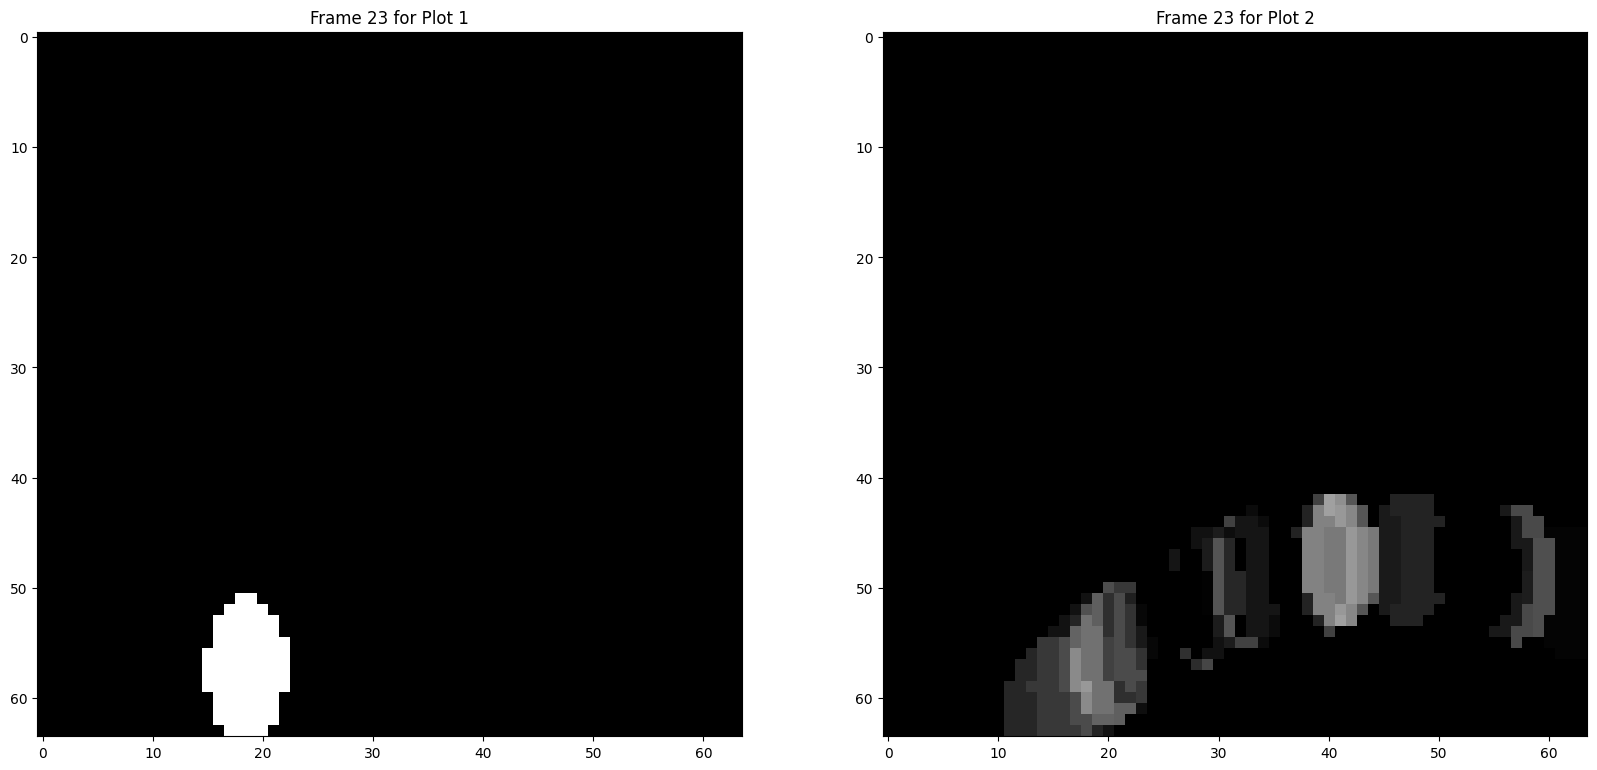

In [34]:
create_double_gif('./video_1/test_target/','_test_target.txt', './video_1/SimTestPred/', '_prediction.txt',  'testing.gif', 24)

MovieWriter ffmpeg unavailable; using Pillow instead.


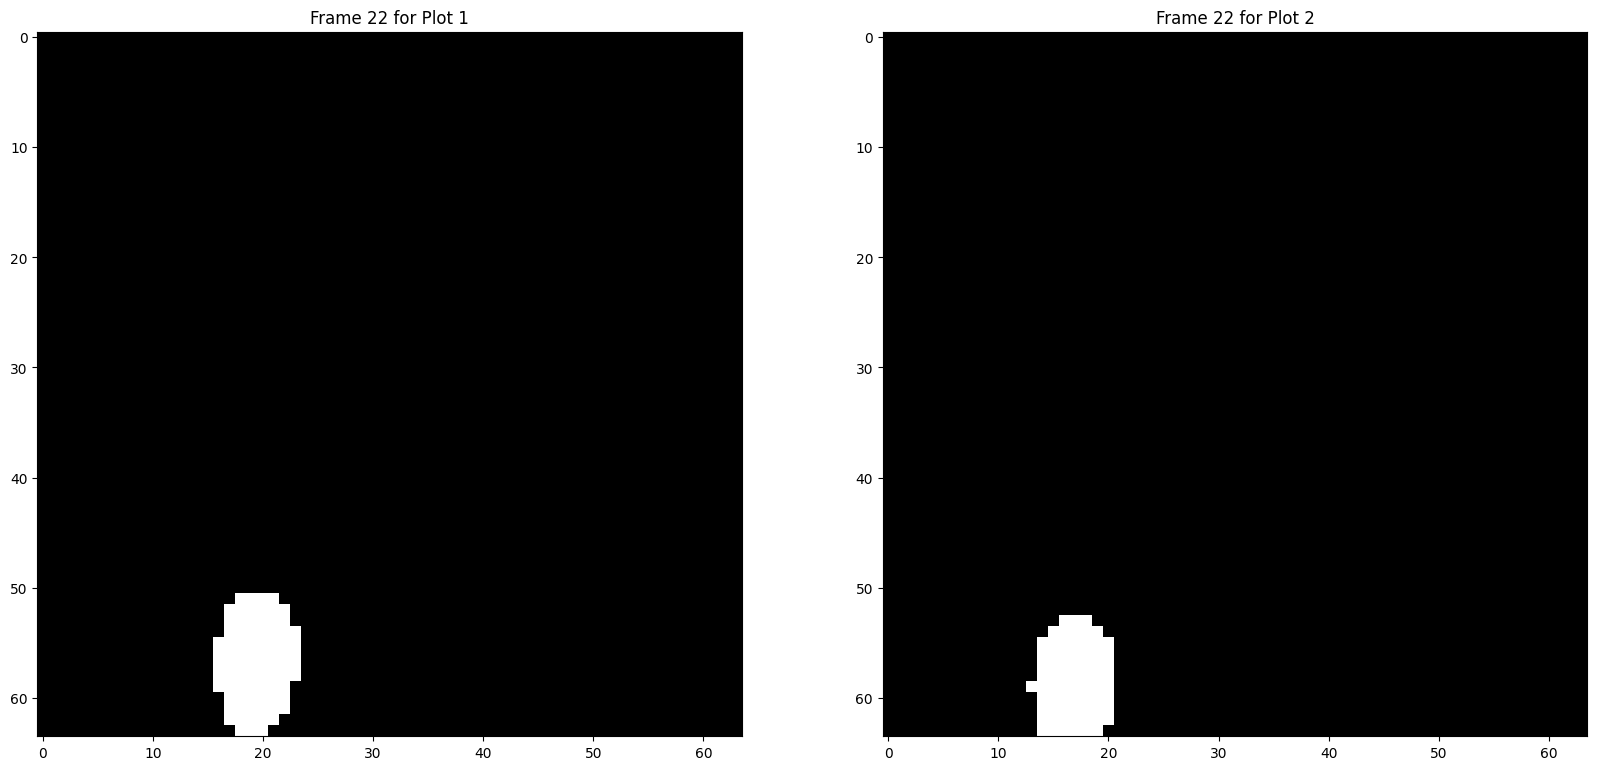

In [16]:
create_double_gif('./video_1/train_target/','_train_target.txt', './video_1/SimTestPred/', '_prediction.txt',  'testing.gif', 23)

In [28]:
stim_interval = 300                                                                                 # intervallo tra ogni stimolo
stim_length = 50                                                                                    # lunghezza dello stimolo (durata dello stimolo in ms)
stim_rate = 200  #[1/s]                                                                             # frequenza dello stimolo 

readout_delay = 50                                                                                  # ritardo della lettura
    
sim_time = (10 * stim_interval) + stim_length + stim_interval + readout_delay            # tempo massimo della simulazione, resa parametrica! 

stim_times = np.arange(stim_interval, sim_time - stim_length - readout_delay, stim_interval)        # tempo dello stimolo       
                                                                                                        # ritorna un array di valori compresi tra
                                                                                                        # [valore_partenza, valore_finale(escluso), intervallo]
readout_times = stim_times + stim_length + readout_delay     

In [32]:
readout_times

array([ 400,  700, 1000, 1300, 1600, 1900, 2200, 2500, 2800, 3100])

In [31]:
stim_times

array([ 300,  600,  900, 1200, 1500, 1800, 2100, 2400, 2700, 3000])